   Feature_1  Feature_2  Cluster
0  -7.726421  -8.394957        2
1   5.453396   0.742305        1
2  -2.978672   9.556846        0
3   6.042673   0.571319        1
4  -6.521840  -6.319325        2
        Feature_1   Feature_2     Cluster
count  100.000000  100.000000  100.000000
mean    -1.716279    1.474851    0.990000
std      4.804275    6.505181    0.822598
min     -8.487110   -8.394957    0.000000
25%     -6.435252   -6.094340    0.000000
50%     -2.603027    1.922690    1.000000
75%      3.837695    8.313123    2.000000
max      6.526065   10.866564    2.000000


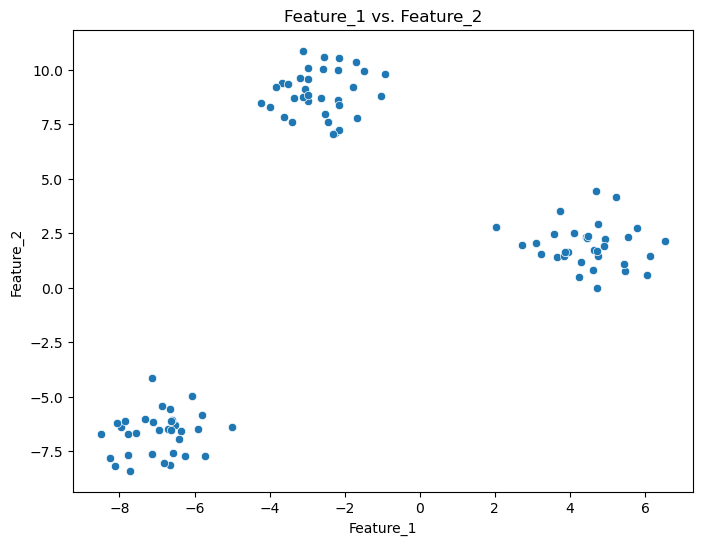

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


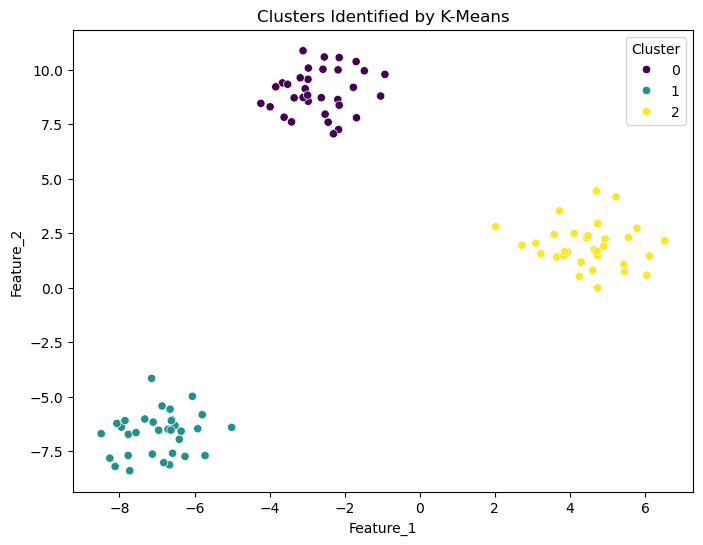

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

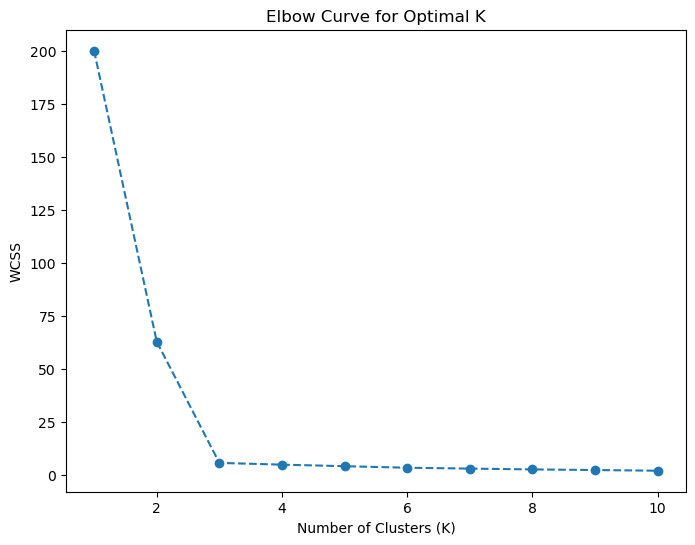

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Score for K=2: 0.6871071611109728
Silhouette Score for K=3: 0.8492776082622018
Silhouette Score for K=4: 0.6768271841283466
Silhouette Score for K=5: 0.5110793716745563


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
df = pd.read_csv(r"C:\Users\madha\Downloads\Day_28_Clustering_Dataset.csv")  
print(df.head())
print(df.describe())
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'])
plt.title("Feature_1 vs. Feature_2")
plt.show()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Feature_1', 'Feature_2']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Feature_1'], y=df['Feature_2'], hue=df['Cluster'], palette='viridis')
plt.title("Clusters Identified by K-Means")
plt.show()
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Curve for Optimal K')
plt.show()

# Silhouette Score Evaluation
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    print(f'Silhouette Score for K={k}: {score}')
